In [1]:
# %%
import sys
sys.path.append('/Users/haniftayarani/On_Road_Emission_Model/src')
from src.reading_input import load_csv_as_dataframe
import src.utilities
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the file
input_df = load_csv_as_dataframe('/Users/haniftayarani/On_Road_Emission_Model/Data/Input_Data.csv')

File loaded successfully: /Users/haniftayarani/On_Road_Emission_Model/Data/Input_Data.csv


## Question 1-a: 
How do electric heavy-duty truck (MHDT, HHDT) and bus (OBUS, SBUS) populations change over time?

You selected: Electricity
You selected: ['HHDT', 'MHDT', 'SBUS', 'OBUS']


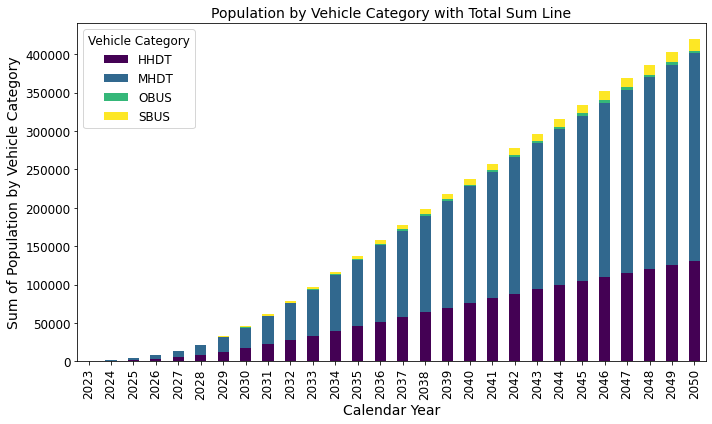

In [3]:
q1_instance = src.utilities.Q1(input_df)
q1_instance.filter_by_fuel_type()
q1_instance.filter_by_multiple_choices()
q1_instance.group_and_sum_column('Population')
q1_instance.plot_stacked_bar_with_line("Population")


## Qestion 1-b:
Which county is projected to have the largest electric heavy-duty truck population by 2040?

You selected: Electricity
You selected: ['HHDT', 'MHDT']


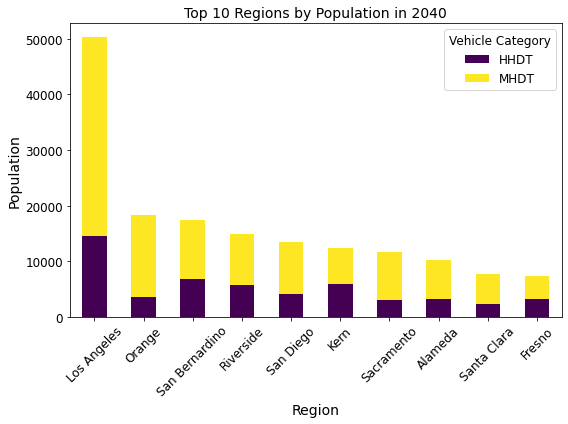

In [4]:
q1_instance = src.utilities.Q1(input_df)
q1_instance.filter_by_fuel_type()
q1_instance.filter_by_multiple_choices()
q1_instance.plot_top_regions_population(2040)

## Question 2:
CARB's Clean Truck Check Program ensures that proper maintenance of vehicle emissions after treatment systems. 
The impacts of this program were not reflected in EMFAC2021, since the regulation was adopted after the release of the model.
Please use the information provided in the table below to estimate the impact of this regulation. 
Please note that these reduction factors depend on calendar year, which represents different phases of the program, and NOx emissions
reductions only apply to vehicles with EMFAC model years 2014 or newer that are equipped with on-board diagnostics systems.
Please calculate NOx and PM2.5 total exhaust emissions (denoted as TOTEX) before
and after this regulation by calendar year.


<img src="q2.png" alt="Table of Emission Reductions" width="1000"/>



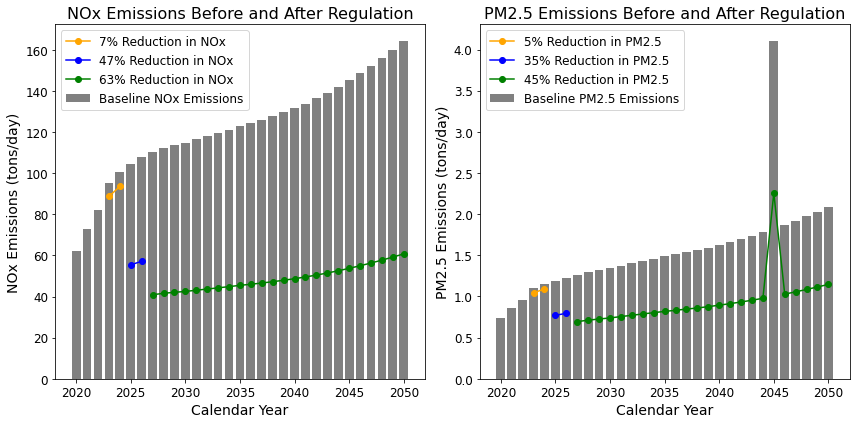

In [5]:
q2_instance = src.utilities.Q2(input_df)
baseline_emissions = q2_instance.selection()
q2_instance.baseline_emissions = baseline_emissions.apply(q2_instance.apply_reduction, axis=1)
q2_instance.plot_emission_reduction()

## Question 3:
Emission rates can be characterized as grams of emissions per mile traveled (g/mile). 
Using the data provided, please calculate the statewide fleet average running exhaust
 NOx emission rate of heavy heavy-duty trucks (HHDT) from 2020 to 2040?
Which county has the highest NOx emission rate in 2035? Note that running exhaust NOx
 is denoted as NOx_RUNEX. Hint: the fleet averages should be weighted by VMT.

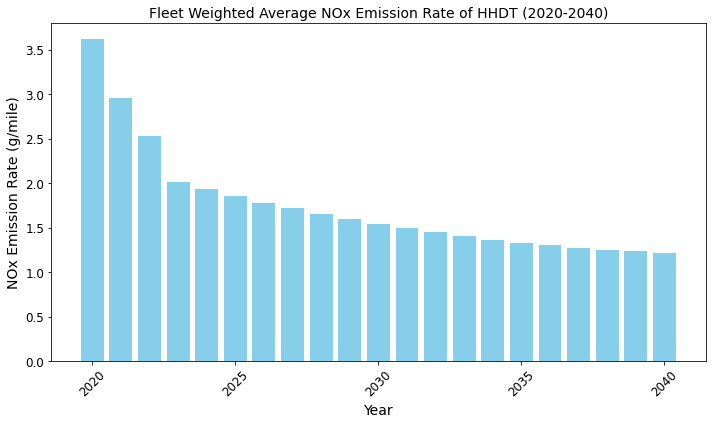

In [6]:
q3_instance = src. utilities.Q3(input_df, '/Users/haniftayarani/On_Road_Emission_Model/Data/cb_2018_us_county_5m')
q3_instance.calculate_nox_emission_rates()
q3_instance.plot_fleet_average_nox()

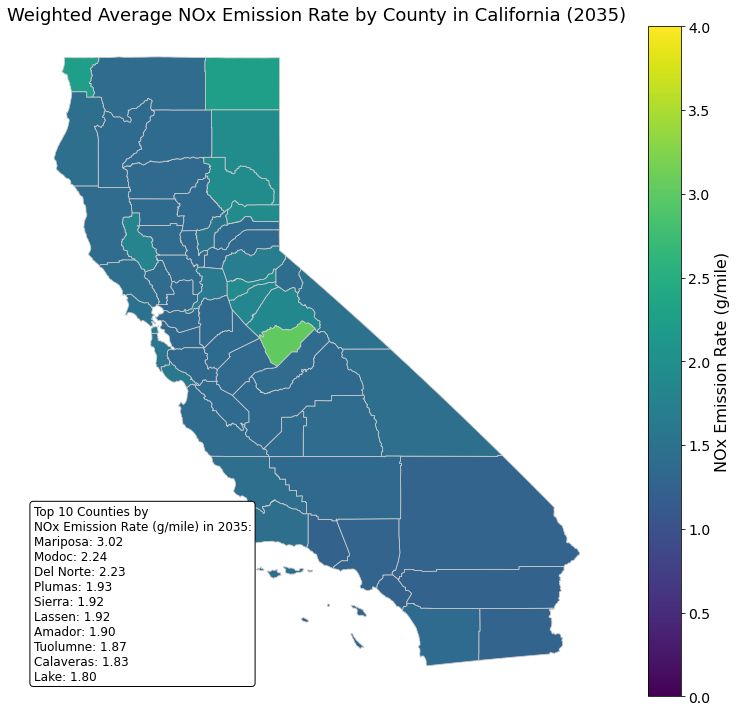

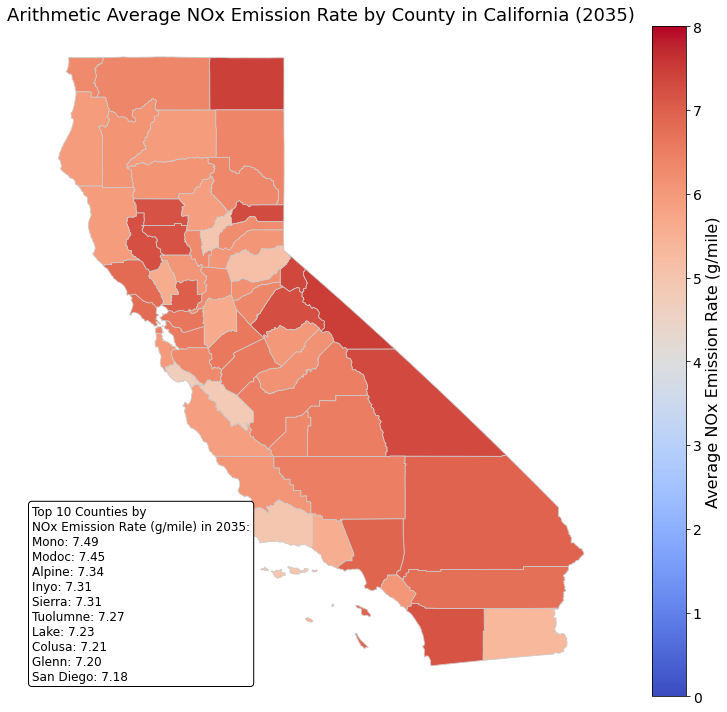

In [7]:
q3_instance.plot_nox_heat_map(2035)
q3_instance.plot_yearly_average_nox_heat_map(2035)

## Question 4:
Your manager suspects there may be several issues with the data provided to you for this exercise. Can you examine the dataset and identify any anomalies or inconsistencies that might indicate issues with the quality of the data?

In [7]:
# Check for missing values
q4_instance = src. utilities.Q4(input_df)
q4_instance.get_summary_statistics()

,Calendar Year,Model Year,Population,Total VMT,CVMT,EVMT,Trips,Energy Consumption,NOx_RUNEX,NOx_IDLEX,...,NH3_RUNEX,Fuel Consumption,emr_pm2.5,emr_pm10,emr_nox,emr_c02,emr_ch4,emr_n2o,emr_co,emr_SOx
count,814631.000000,814631.000000,8.146310e+05,8.146310e+05,814631.000000,814631.000000,814631.000000,814631.000000,8.146310e+05,8.146310e+05,...,8.146310e+05,814631.000000,814631.000000,814631.000000,814631.000000,814631.000000,814631.000000,814631.000000,814631.000000,814631.000000
mean,2036.422138,2019.307103,3.472892e+01,3.074415e+03,2637.853703,437.303506,494.513926,651.846345,3.738983e-03,1.208182e-03,...,6.669426e-04,0.370934,0.066584,0.127383,3.995804,1458.265764,0.396470,0.176205,8.699640,0.012114
std,8.793906,15.352160,1.834526e+02,2.331835e+04,22892.024366,4698.019162,2882.400625,7129.699015,3.359849e-02,1.144212e-02,...,5.603814e-03,3.176274,0.148486,0.162207,7.084999,791.012618,1.274111,0.148339,25.736664,0.008910
min,2020.000000,1976.000000,2.575564e-07,5.167811e-07,0.000000,0.000000,0.000004,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2029.000000,2009.000000,2.453661e-01,8.800179e+00,1.531882,0.000000,2.469266,0.000000,6.282579e-07,4.589539e-10,...,1.097430e-07,0.000248,0.022330,0.064688,0.173868,1107.492221,0.001094,0.023664,0.361003,0.000000
50%,2037.000000,2021.000000,1.677522e+00,6.244302e+01,31.502753,0.000000,18.167983,0.000000,1.469764e-05,7.995519e-07,...,2.968809e-06,0.004806,0.026144,0.071985,0.812703,1492.154555,0.016486,0.194814,1.217035,0.013365
75%,2044.000000,2031.000000,8.782026e+00,3.900968e+02,233.821350,0.000000,104.242720,0.000000,2.399532e-04,4.004829e-05,...,3.894512e-05,0.036206,0.056862,0.138193,4.365794,1972.927541,0.102737,0.248395,4.894862,0.018792
max,2050.000000,2051.000000,8.352302e+03,9.940624e+05,994062.434740,250854.696739,105569.190892,433693.316551,2.825985e+00,4.295864e-01,...,2.410685e-01,129.253165,2.631552,2.796362,98.219838,9692.879405,25.908986,1.595694,888.092609,0.095824


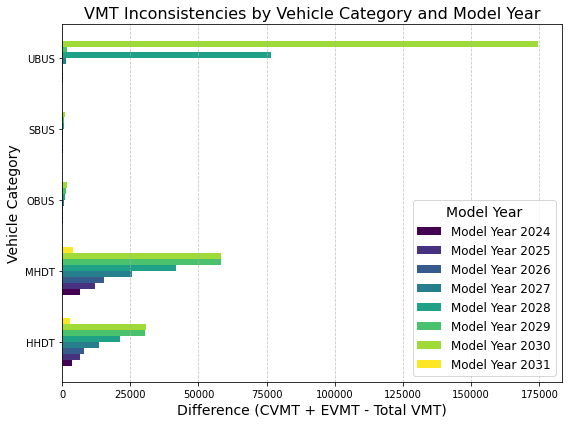

,Region,Calendar Year,Vehicle Category,Model Year,Total VMT,CVMT,EVMT,Difference
572686,San Francisco,2030,HHDT,2024,266.196625,0.0,3992.949382,3726.752757
572722,San Francisco,2030,HHDT,2025,464.080339,0.0,6961.205092,6497.124753
572758,San Francisco,2030,HHDT,2026,585.164757,0.0,8777.471355,8192.306598
572794,San Francisco,2030,HHDT,2027,960.280447,0.0,14404.206703,13443.926256
572830,San Francisco,2030,HHDT,2028,1529.755670,0.0,22946.335044,21416.579375
572866,San Francisco,2030,HHDT,2029,2162.859660,0.0,32442.894898,30280.035238
572902,San Francisco,2030,HHDT,2030,2208.094358,0.0,33121.415377,30913.321019
572928,San Francisco,2030,HHDT,2031,220.358050,0.0,3305.370746,3085.012696
573756,San Francisco,2030,MHDT,2024,479.804243,0.0,7197.063645,6717.259402
573792,San Francisco,2030,MHDT,2025,862.849553,0.0,12942.743298,12079.893745


In [9]:
q4_instance.plot_vmt_inconsistencies()

In [10]:
q4_instance.analyze_fuel_inconsistencies()

{'Unique Regions': array(['Santa Barbara', 'San Joaquin', 'Madera', 'San Bernardino',
        'Trinity', 'Tulare', 'Riverside', 'Mendocino', 'Sacramento',
        'Humboldt'], dtype=object),
 'Inconsistencies by Region': Region
 Trinity           33
 Humboldt          33
 San Joaquin       10
 Madera            10
 San Bernardino    10
 Riverside         10
 Sacramento        10
 Santa Barbara      9
 Tulare             9
 Mendocino          9
 Name: count, dtype: int64,
 'Total VMT Range': (0.0314080661592627, 59.44918760385291),
 'Calendar Year Range': (2020, 2038),
 'Model Year Range': (2018, 2028),
 'Inconsistencies by Vehicle Category': Vehicle Category
 UBUS    143
 Name: count, dtype: int64}

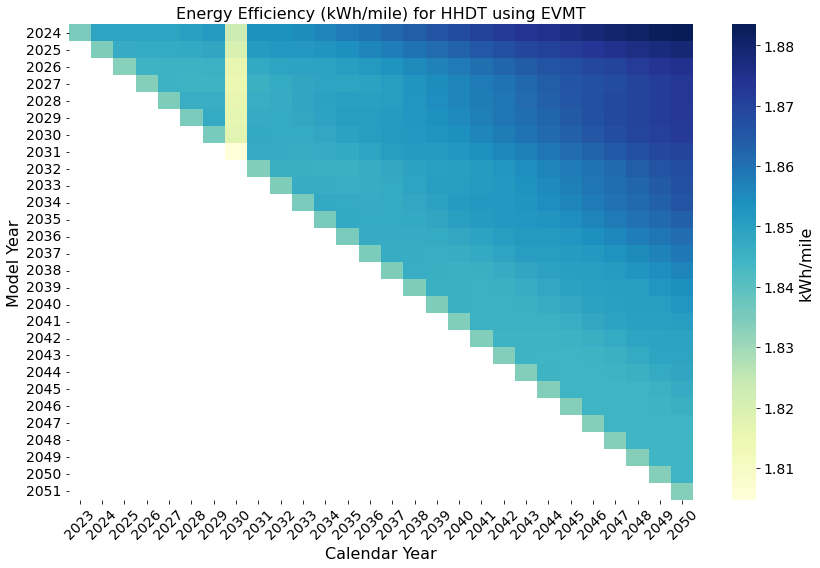

,Region,Calendar Year,Vehicle Category,Model Year,Speed,Fuel,Population,Total VMT,CVMT,EVMT,...,Fuel Consumption,emr_pm2.5,emr_pm10,emr_nox,emr_c02,emr_ch4,emr_n2o,emr_co,emr_SOx,kWh_mile
5500,Inyo,2023,HHDT,2024,Aggregate,Electricity,0.446689,38.995777,0.0,38.995777,...,0.0,0.024545,0.081467,0.0,0.0,0.0,0.0,0.0,0.0,1.832100
5501,Lake,2023,HHDT,2024,Aggregate,Electricity,0.198049,10.624390,0.0,10.624390,...,0.0,0.024443,0.080946,0.0,0.0,0.0,0.0,0.0,0.0,1.835214
5502,San Joaquin,2023,HHDT,2024,Aggregate,Electricity,7.235982,504.447205,0.0,504.447205,...,0.0,0.024159,0.080142,0.0,0.0,0.0,0.0,0.0,0.0,1.831083
5503,San Luis Obispo,2023,HHDT,2024,Aggregate,Electricity,1.129035,69.179489,0.0,69.179489,...,0.0,0.024576,0.081232,0.0,0.0,0.0,0.0,0.0,0.0,1.840580
5504,Santa Barbara,2023,HHDT,2024,Aggregate,Electricity,1.422176,81.076225,0.0,81.076225,...,0.0,0.024375,0.080512,0.0,0.0,0.0,0.0,0.0,0.0,1.843825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810283,Alameda,2050,HHDT,2051,Aggregate,Electricity,149.316614,10276.026312,0.0,10276.026312,...,0.0,0.025940,0.085277,0.0,0.0,0.0,0.0,0.0,0.0,1.830287
810284,Contra Costa,2050,HHDT,2051,Aggregate,Electricity,46.113088,2875.822697,0.0,2875.822697,...,0.0,0.025759,0.084641,0.0,0.0,0.0,0.0,0.0,0.0,1.833136
810285,Santa Clara,2050,HHDT,2051,Aggregate,Electricity,92.459772,5733.358298,0.0,5733.358298,...,0.0,0.025645,0.084215,0.0,0.0,0.0,0.0,0.0,0.0,1.835003
810286,Merced,2050,HHDT,2051,Aggregate,Electricity,94.417295,7588.272580,0.0,7588.272580,...,0.0,0.025854,0.085131,0.0,0.0,0.0,0.0,0.0,0.0,1.827803


In [11]:
q4_instance.plot_energy_inconsistencies_heatmap()

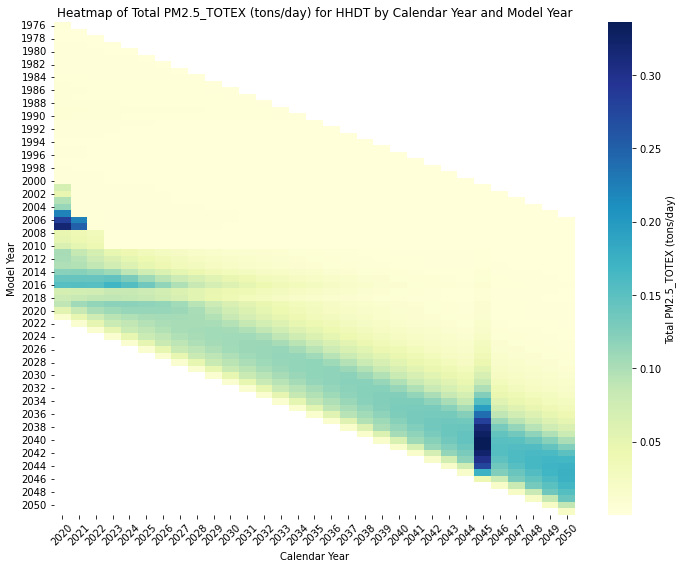

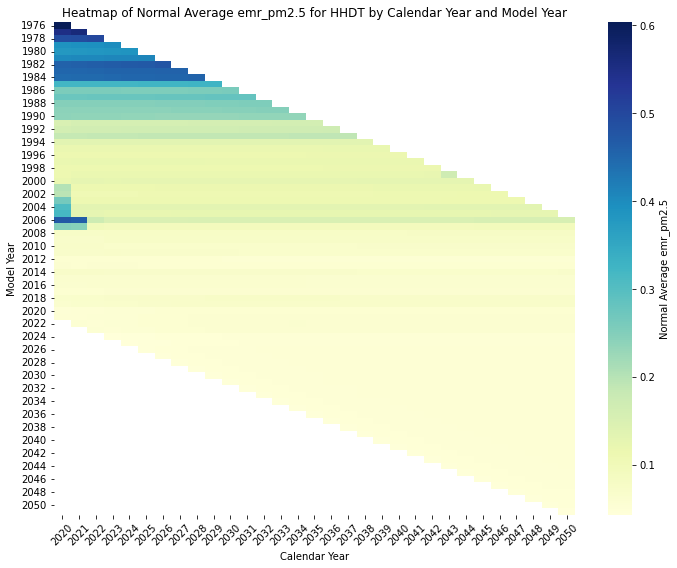

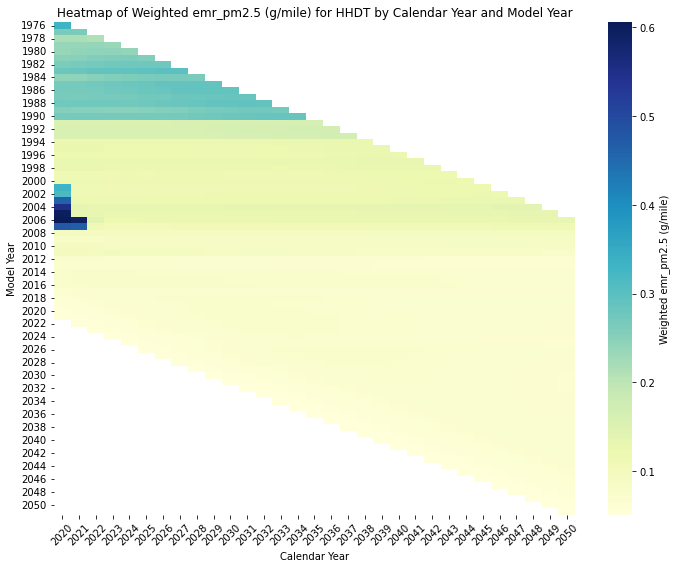

In [9]:
q4_instance.run_analysis()

In [8]:
q4_instance.analyze_gas_data()


Selected Column: PM2.5_TOTEX
Number of rows with zero values in 'PM2.5_TOTEX': 99
Percentage of rows with zero values: 0.02%


{'Selected Column': 'PM2.5_TOTEX',
 'Zero Count': 99,
 'Zero Percentage': 0.01943771977876341}